In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import numpy as np

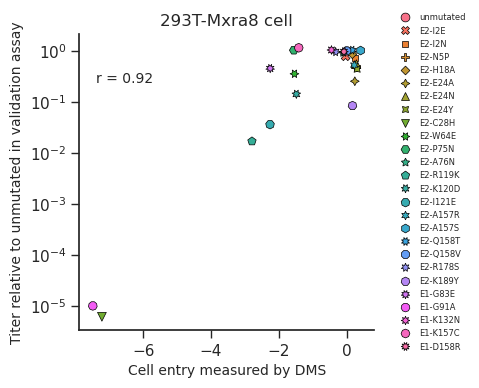

In [65]:
# Load data
df = pd.read_csv('experimental_data/cell_entry_validations.csv')

# Calculate Pearson correlation using log-transformed titer
r_value, _ = pearsonr(
    df['entry in 293T_Mxra8 cells'],
    np.log10(df['relative titer in 293T_Mxra8 cells'])
)

# Set style without grid lines
sns.set(style="white", context="notebook", font_scale=1)

# Create square figure with enough space for the legend
plt.figure(figsize=(5, 4))

# Create scatter plot
ax = sns.scatterplot(
    x='entry in 293T_Mxra8 cells',
    y='relative titer in 293T_Mxra8 cells',
    hue='mutation',
    style='mutation',
    data=df,
    s=40,
    edgecolor='black'
)

# Set y-axis to log scale
ax.set_yscale('log')

# Turn off all grid lines
ax.grid(False)

# Show only left and bottom spines (clean axis style)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Configure major tick marks and labels
ax.tick_params(
    axis='both',
    which='major',
    length=6,
    width=1,
    direction='out',
    bottom=True,
    left=True,
    labelbottom=True,
    labelleft=True
)

# Optionally disable minor ticks if they appear
ax.tick_params(which='minor', length=0)

# Annotate correlation coefficient
x_pos = df['entry in 293T_Mxra8 cells'].min() + 0.1
y_pos = df['relative titer in 293T_Mxra8 cells'].max() / 5
ax.text(x_pos, y_pos, f"r = {r_value:.2f}", fontsize=10)

# Labels and title
ax.set_xlabel("Cell entry measured by DMS", fontsize=10)
ax.set_ylabel("Titer relative to unmutated in validation assay", fontsize=10)
ax.set_title("293T-Mxra8 cell", fontsize=12)

# Move legend outside the plot and adjust font size
ax.legend(
    bbox_to_anchor=(1.05, 0.5),  # Adjusting legend position (centered on the right)
    loc='center left',  # Positioning legend on the left side of bbox_to_anchor
    borderaxespad=0.5,  # Space between the plot and the legend
    frameon=False,
    ncol=1,  # Adjust number of columns if needed
    prop={'size': 6}  # Set the font size here (adjust as needed)
)

# Adjust layout to fit everything
plt.tight_layout()

# Save as SVG to the figures folder
plt.savefig("figures/cell_entry_validation_293T-Mxra8.svg", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


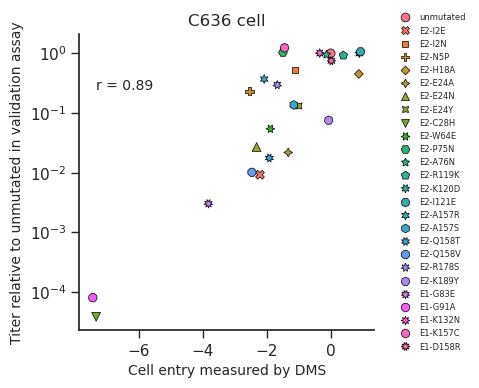

In [66]:
# Calculate Pearson correlation using log-transformed titer
r_value, _ = pearsonr(
    df['entry in C636 cells'],
    np.log10(df['relative titer in C636 cells'])
)

# Set style without grid lines
sns.set(style="white", context="notebook", font_scale=1)

# Create square figure with enough space for the legend
plt.figure(figsize=(5, 4))

# Create scatter plot
ax = sns.scatterplot(
    x='entry in C636 cells',
    y='relative titer in C636 cells',
    hue='mutation',
    style='mutation',
    data=df,
    s=40,
    edgecolor='black'
)

# Set y-axis to log scale
ax.set_yscale('log')

# Turn off all grid lines
ax.grid(False)

# Show only left and bottom spines (clean axis style)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Configure major tick marks and labels
ax.tick_params(
    axis='both',
    which='major',
    length=6,
    width=1,
    direction='out',
    bottom=True,
    left=True,
    labelbottom=True,
    labelleft=True
)

# Optionally disable minor ticks if they appear
ax.tick_params(which='minor', length=0)

# Annotate correlation coefficient
x_pos = df['entry in C636 cells'].min() + 0.1
y_pos = df['relative titer in C636 cells'].max() / 5
ax.text(x_pos, y_pos, f"r = {r_value:.2f}", fontsize=10)

# Labels and title
ax.set_xlabel("Cell entry measured by DMS", fontsize=10)
ax.set_ylabel("Titer relative to unmutated in validation assay", fontsize=10)
ax.set_title("C636 cell", fontsize=12)

# Move legend outside the plot and adjust font size
ax.legend(
    bbox_to_anchor=(1.05, 0.5),  # Adjusting legend position (centered on the right)
    loc='center left',  # Positioning legend on the left side of bbox_to_anchor
    borderaxespad=0.5,  # Space between the plot and the legend
    frameon=False,
    ncol=1,  # Adjust number of columns if needed
    prop={'size': 6}  # Set the font size here (adjust as needed)
)

# Adjust layout to fit everything
plt.tight_layout()

# Save as SVG to the figures folder
plt.savefig("figures/cell_entry_validation_C636.svg", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()




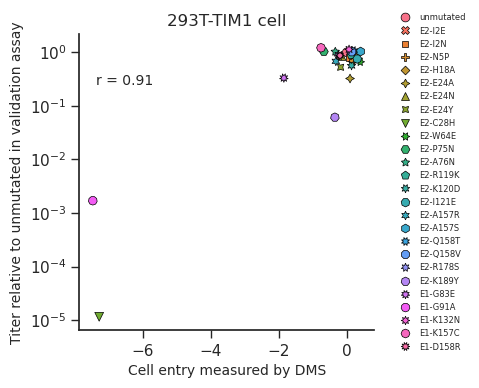

In [67]:
# Calculate Pearson correlation using log-transformed titer
r_value, _ = pearsonr(
    df['entry in 293T_TIM1 cells'],
    np.log10(df['relative titer in 293T_TIM1 cells'])
)

# Set style without grid lines
sns.set(style="white", context="notebook", font_scale=1)

# Create square figure with enough space for the legend
plt.figure(figsize=(5, 4))

# Create scatter plot
ax = sns.scatterplot(
    x='entry in 293T_TIM1 cells',
    y='relative titer in 293T_TIM1 cells',
    hue='mutation',
    style='mutation',
    data=df,
    s=40,
    edgecolor='black'
)

# Set y-axis to log scale
ax.set_yscale('log')

# Turn off all grid lines
ax.grid(False)

# Show only left and bottom spines (clean axis style)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Configure major tick marks and labels
ax.tick_params(
    axis='both',
    which='major',
    length=6,
    width=1,
    direction='out',
    bottom=True,
    left=True,
    labelbottom=True,
    labelleft=True
)

# Optionally disable minor ticks if they appear
ax.tick_params(which='minor', length=0)

# Annotate correlation coefficient
x_pos = df['entry in 293T_TIM1 cells'].min() + 0.1
y_pos = df['relative titer in 293T_TIM1 cells'].max() / 5
ax.text(x_pos, y_pos, f"r = {r_value:.2f}", fontsize=10)

# Labels and title
ax.set_xlabel("Cell entry measured by DMS", fontsize=10)
ax.set_ylabel("Titer relative to unmutated in validation assay", fontsize=10)
ax.set_title("293T-TIM1 cell", fontsize=12)

# Move legend outside the plot and adjust font size
ax.legend(
    bbox_to_anchor=(1.05, 0.5),  # Adjusting legend position (centered on the right)
    loc='center left',  # Positioning legend on the left side of bbox_to_anchor
    borderaxespad=0.5,  # Space between the plot and the legend
    frameon=False,
    ncol=1,  # Adjust number of columns if needed
    prop={'size': 6}  # Set the font size here (adjust as needed)
)

# Adjust layout to fit everything
plt.tight_layout()

# Save as SVG to the figures folder
plt.savefig("figures/cell_entry_validation_293T-TIM1.svg", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


